In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [2]:
def PA_model(n,m,G) :
    while G.number_of_nodes() < n :
        new = G.number_of_nodes()
        before_node = list(G.nodes())
        G.add_node(new)
        
#         i = 0
#         while i < m :
#             linked_node = random.choice(list(G.nodes()))
#             if linked_node == new :
#                 continue
#             G.add_edge(new+1,linked_node)
#             i += 1
            
        for i in range(m) :
            linked_node = random.choice(before_node)
            G.add_edge(new,linked_node)
    
    return G
        

In [3]:
# initial network
#m0 = 10
# G0 = nx.Graph()
# for i in range(m0) :
#     G0.add_node(i)
    
G0 = nx.complete_graph(n =3)

In [4]:
N = 10**4
m = 3

In [5]:
G1 = PA_model(N,m,G0)
G2 = PA_model(5*N,m,G1)
G3 = PA_model(40*N,m,G2)

In [7]:
#degree distribution
degree_sequence1 = sorted((d for n, d in G1.degree()), reverse=True)
deg_d1 = np.unique(degree_sequence1,return_counts=True)

degree_sequence2 = sorted((d for n, d in G2.degree()), reverse=True)
deg_d2 = np.unique(degree_sequence2,return_counts=True)

degree_sequence3 = sorted((d for n, d in G3.degree()), reverse=True)
deg_d3 = np.unique(degree_sequence3,return_counts=True)

In [9]:
deg_d3

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 42, 46]),
 array([     1, 100135,  75046,  56040,  42057,  31625,  23618,  17932,
         13646,   9983,   7373,   5674,   4192,   3211,   2360,   1768,
          1344,   1001,    770,    553,    415,    328,    227,    184,
           115,     94,     82,     58,     44,     37,     31,     17,
            13,     12,      3,      4,      3,      2,      1,      1],
       dtype=int64))

In [14]:
# prediction 
prediction = []
for i in range(50) :
    prediction.append(40*N*(1/m)*np.exp(1-i/m))

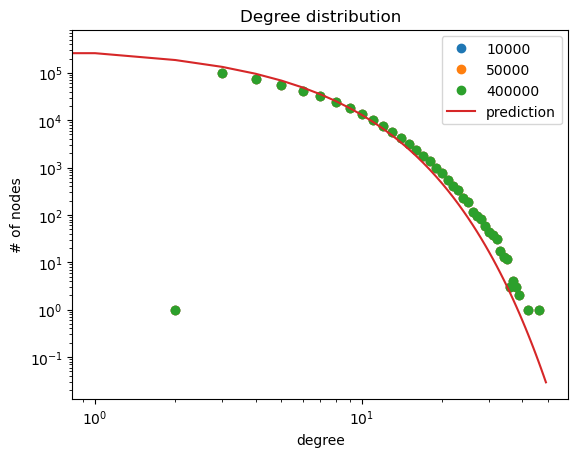

In [15]:
plt.loglog(deg_d1[0],deg_d1[1],'o', label = '10000')
plt.loglog(deg_d2[0],deg_d2[1],'o',label = '50000')
plt.loglog(deg_d3[0],deg_d3[1],'o', label = '400000')
plt.loglog(prediction,'-', label = 'prediction')
plt.xlabel('degree')
plt.ylabel('# of nodes')
plt.title('Degree distribution')
plt.legend()